<a href="https://colab.research.google.com/github/Mona-Bhagat/Predicting-Machine-Failures-with-Machine-Learning/blob/main/Machine_Failure_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Importing dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the csv stored data into a dataframe

df = pd.read_csv('/content/ai4i2020.csv')

In [ ]:
#Checking for any nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:

# Cleaning column names for model readability

df.columns = (
    df.columns
    .str.replace('[\[\]<>]', '', regex=True)
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


rename_dict = {
    'machine_failure': 'Failure',
}

df.rename(columns=rename_dict, inplace=True)


In [ ]:
#checking the headers result after cleaning

print(df.columns.tolist())

['udi', 'product_id', 'type', 'air_temperature_k', 'process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min', 'Failure', 'twf', 'hdf', 'pwf', 'osf', 'rnf']


In [ ]:
df.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,Failure,twf,hdf,pwf,osf,rnf
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Splitting the dataset into features and target

In [18]:
# dropping column 'failure' and storing into variable target

features = df.drop(columns=['Failure', 'udi', 'product_id','type','twf','hdf','pwf','osf','rnf'], axis=1)
target = df['Failure']
target

,Failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [19]:
features.head()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [21]:
# finding correlation between the features

numeric_features = features.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_features.corr()


In [24]:
corr_matrix

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
air_temperature_k,1.000000,0.876107,0.022670,-0.013778,0.013853
process_temperature_k,0.876107,1.000000,0.019277,-0.014061,0.013488
rotational_speed_rpm,0.022670,0.019277,1.000000,-0.875027,0.000223
torque_nm,-0.013778,-0.014061,-0.875027,1.000000,-0.003093
tool_wear_min,0.013853,0.013488,0.000223,-0.003093,1.000000


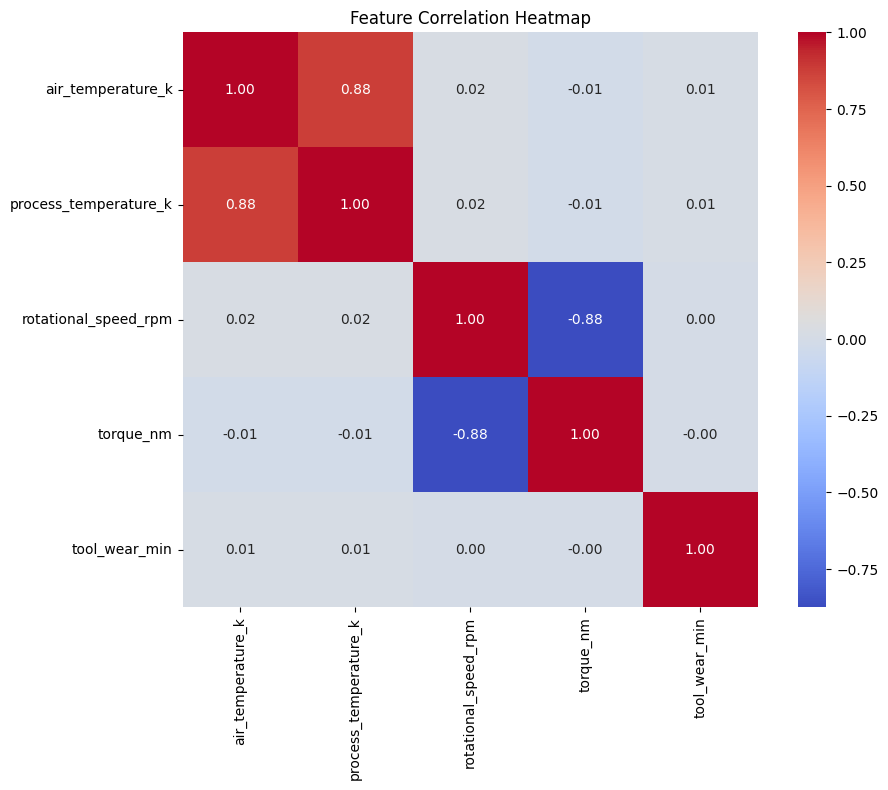

In [23]:
# Plotting heatmap for visual presentation of collinearity

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

Since Air temperature has high positive corelation with Process temp, Air temp would be dropped
Similarly, rotational speed and torque are strongly related (negative), Torque would be dropped

In [32]:
print(features.columns.tolist())


['process_temperature_k', 'rotational_speed_rpm', 'tool_wear_min']


In [ ]:
# checking the balance of the target column

target.value_counts()

,count
Failure,
0,9661
1,339


The data is highly imbalanced

<Axes: ylabel='count'>

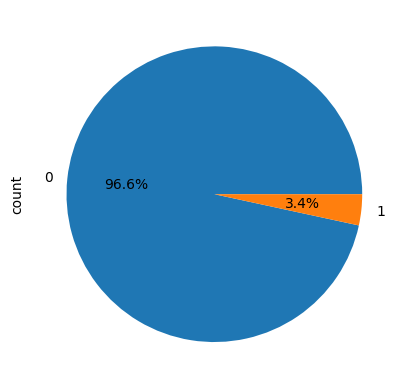

In [33]:
target.value_counts().plot.pie(autopct='%1.1f%%')

Steps to make the balanced for model training

In [34]:
#importing libraries for performing train-test split

from sklearn.model_selection import train_test_split


# splitting the data into Train-test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [35]:

# importing libraries for performing train-test split and undersampling

from imblearn.under_sampling import RandomUnderSampler


# Applying undersampling to training set only

rus = RandomUnderSampler(random_state=42)
features_train_resampled, target_train_resampled = rus.fit_resample(features_train, target_train)

# Checking the new class distribution
print(target_train_resampled.value_counts())


Failure
0    278
1    278
Name: count, dtype: int64


## Model Training - Three models would be used suitable for data format, which is tabular - Neural Network and XG Boost and Random Forest

In [36]:
# importing standard scaler from sklearn library to scale features for neural nets

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train_resampled)
features_test_scaled = scaler.transform(features_test)

Training Neural Netwrok

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, early_stopping=True, random_state=42)
mlp.fit(features_train_scaled, target_train_resampled)

target_pred_mlp = mlp.predict(features_test_scaled)

print("MLP Classifier Results:\n")
print(confusion_matrix(target_test, target_pred_mlp))
print(classification_report(target_test, target_pred_mlp))


MLP Classifier Results:

[[1305  634]
 [   9   52]]
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1939
           1       0.08      0.85      0.14        61

    accuracy                           0.68      2000
   macro avg       0.53      0.76      0.47      2000
weighted avg       0.97      0.68      0.78      2000



Training XGBoost

In [38]:
from xgboost import XGBClassifier


scale = (target_train_resampled == 0).sum() / (target_train_resampled == 1).sum()

xgb = XGBClassifier(random_state=42, scale_pos_weight=scale)

xgb.fit(features_train_resampled, target_train_resampled)
target_pred_xgb = xgb.predict(features_test)


print("XGBoost Results:\n")
print(confusion_matrix(target_test, target_pred_xgb))
print(classification_report(target_test, target_pred_xgb))



XGBoost Results:

[[1607  332]
 [  13   48]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1939
           1       0.13      0.79      0.22        61

    accuracy                           0.83      2000
   macro avg       0.56      0.81      0.56      2000
weighted avg       0.97      0.83      0.88      2000



In [39]:
# training Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(features_train_resampled, target_train_resampled)

target_pred_rf = rf.predict(features_test)

print("Random Forest Results:\n")
print(confusion_matrix(target_test, target_pred_rf))
print(classification_report(target_test, target_pred_rf))


Random Forest Results:

[[1661  278]
 [  14   47]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1939
           1       0.14      0.77      0.24        61

    accuracy                           0.85      2000
   macro avg       0.57      0.81      0.58      2000
weighted avg       0.97      0.85      0.90      2000



Since Random Forest has the highest accuracy score (0.85), decent recall  (0.77) and highest f-1 score (0.24) across the board we focus on further improving its performance by simple hyperparameter tuning and using SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
features_train_smote, target_train_smote = smote.fit_resample(features_train_scaled, target_train_resampled)

# Hoping to have a balanced dataset for training

# Setting up the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Tuning hyperparameters
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fitting the model with SMOTE data
grid_search.fit(features_train_smote, target_train_smote)

# Finding the Best model from grid search
best_rf = grid_search.best_estimator_
target_pred_rf = best_rf.predict(features_test_scaled)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Tuned Random Forest with SMOTE Results:\n")
print(confusion_matrix(target_test, target_pred_rf))
print(classification_report(target_test, target_pred_rf))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 150}
Tuned Random Forest with SMOTE Results:

[[1654  285]
 [  12   49]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1939
           1       0.15      0.80      0.25        61

    accuracy                           0.85      2000
   macro avg       0.57      0.83      0.58      2000
weighted avg       0.97      0.85      0.90      2000



There was a very mariginal increase in the recall for class 1 failure from 0.77 tp 0.80.

F1 score improved from 0.24 to 0.25

Accuracy is same as before 85%.

Precision remains low primarily due to highly imbalanced dataset

Conclusion -

While MLP had the highest recall on failures (0.85) but suffers from massive false positives (634)

XG Boost also performed well on all parameters but was slightly superseded by Random Forest



In [46]:


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def get_metrics(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Class 1)': precision_score(y_true, y_pred, pos_label=1),
        'Recall (Class 1)': recall_score(y_true, y_pred, pos_label=1),
        'F1 Score (Class 1)': f1_score(y_true, y_pred, pos_label=1)
    }

# Collecting results for each model
results = []

results.append(get_metrics('MLP Classifier', target_test, target_pred_mlp))
results.append(get_metrics('XGBoost Classifier', target_test, target_pred_xgb))
results.append(get_metrics('Random Forest', target_test, target_pred_rf))

# Converting to DataFrame for better display
results_df = pd.DataFrame(results)
print(results_df)

                Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0      MLP Classifier    0.6785             0.075802          0.852459   
1  XGBoost Classifier    0.8275             0.126316          0.786885   
2       Random Forest    0.8515             0.146707          0.803279   

   F1 Score (Class 1)  
0            0.139224  
1            0.217687  
2            0.248101  
